## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [1]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx")

# check how many missing values we have
df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [3]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [4]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(selected, axis=1)
df_drop

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
0,32.0,"""84.87882""",100.0,37.9
1,19.5,"""306.5947""",9.0,42.2
2,13.3,"""561.9845""",5.0,47.3
3,13.3,"""561.9845""",5.0,54.8
4,5.0,"""390.5684""",5.0,43.1
...,...,...,...,...
409,13.7,"""4082.015""",0.0,15.4
410,5.6,"""90.45606""",9.0,50.0
411,18.8,"""390.9696""",7.0,40.6
412,8.1,"""104.8101""",5.0,52.5


In [5]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)

df_drop["distance_to_mrt"]

0        84.87882
1       306.59470
2       561.98450
3       561.98450
4       390.56840
          ...    
409    4082.01500
410      90.45606
411     390.96960
412     104.81010
413      90.45606
Name: distance_to_mrt, Length: 414, dtype: float64

In [6]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [7]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df_drop.shape

clean_data = df_drop.dropna()

# check shape again
clean_data.shape

(403, 4)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [8]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
...
clean_data.describe()

,house_age,distance_to_mrt,num_convenience_stores,price_unit_area
count,403.000000,403.000000,403.000000,403.000000
mean,18.607196,1070.118896,4.292804,38.106452
std,22.656541,1255.001088,5.636027,13.610588
min,0.000000,23.382840,-6.000000,7.600000
25%,8.700000,289.324800,1.000000,27.700000
50%,16.100000,492.231300,4.000000,38.600000
75%,28.300000,1442.932500,6.000000,46.600000
max,410.300000,6488.021000,100.000000,117.500000


In [9]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = clean_data[clean_data.num_convenience_stores >= 0]
df_outl.shape

(402, 4)

In [10]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl2 = df_outl[df_outl.num_convenience_stores < 99]
df_outl2.shape

(401, 4)

In [11]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl2 = df_outl2[df_outl2.house_age != 410.3]
df_outl2.shape

(400, 4)

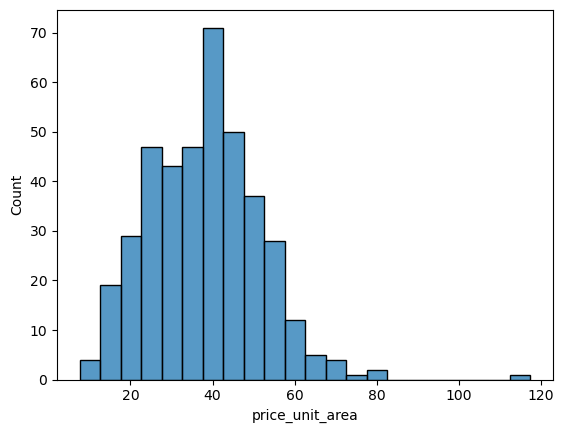

In [12]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...
sns.histplot(df_outl2["price_unit_area"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

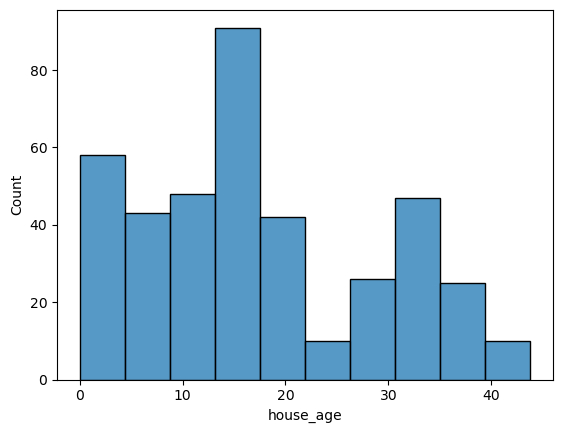

In [13]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...
sns.histplot(df_outl2["house_age"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

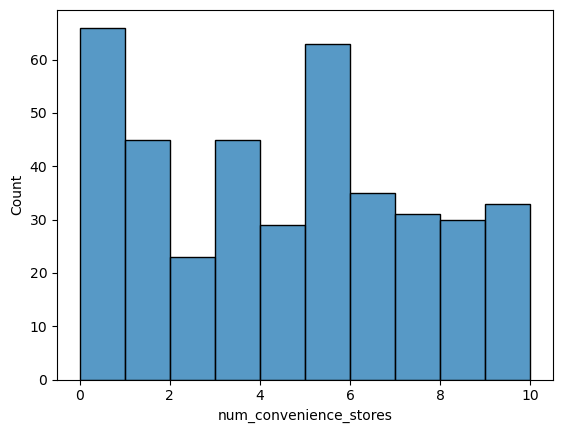

In [14]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...
sns.histplot(df_outl2["num_convenience_stores"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

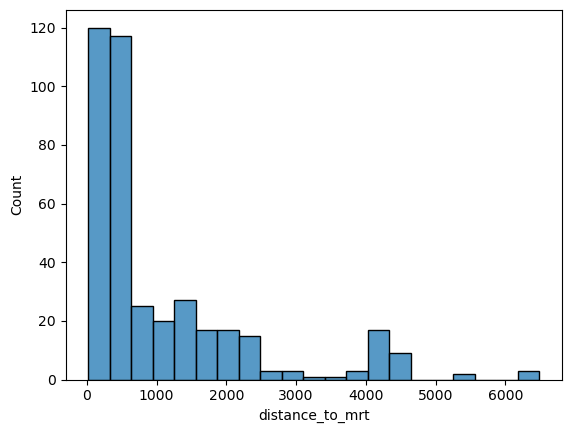

In [15]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
...
sns.histplot(df_outl2["distance_to_mrt"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

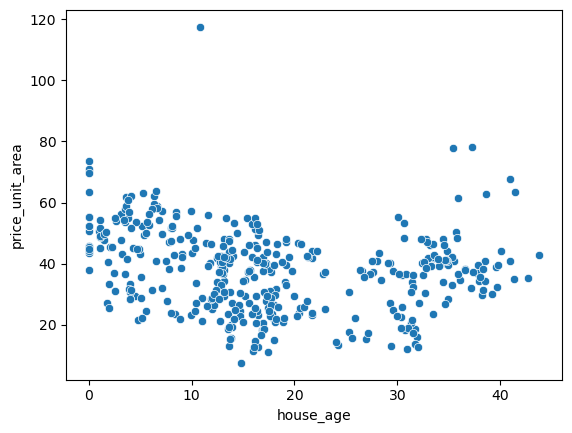

In [16]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...
sns.scatterplot(data=df_outl2, x="house_age", y="price_unit_area")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

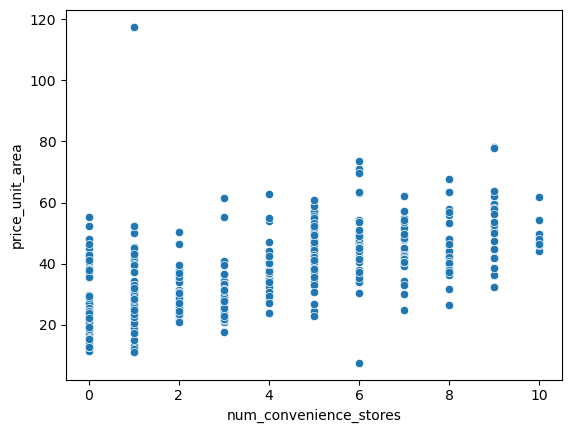

In [17]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...
sns.scatterplot(data=df_outl2, x="num_convenience_stores", y="price_unit_area")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

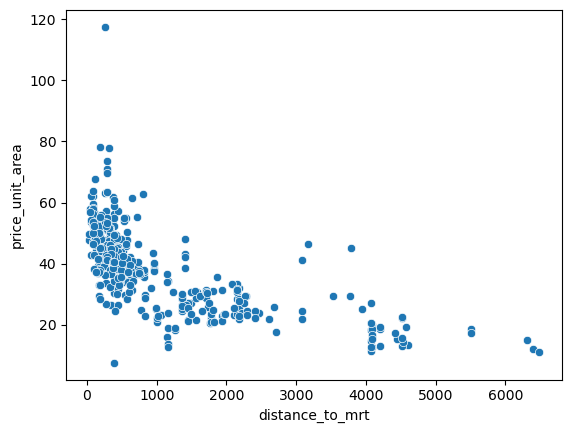

In [18]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
...
sns.scatterplot(data=df_outl2, x="distance_to_mrt", y="price_unit_area")
plt.show

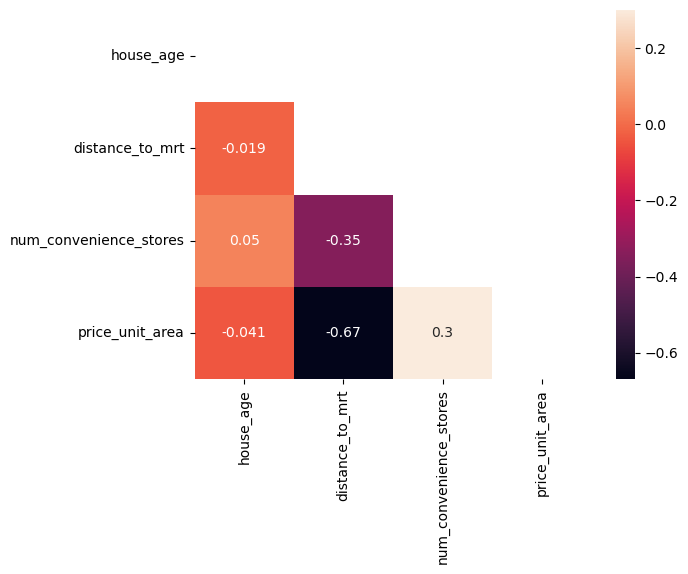

In [20]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

In [22]:
# save data for later modeling
df_outl2.to_csv("../../data/processed/tpdata.xlsx", index=False)